<a href="https://colab.research.google.com/github/tuancompa2610/Air-Quality-Time-Series/blob/main/Time_Series_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [2]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [40]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cfafrica-_-sensors.africa-_-cft.csv to cfafrica-_-sensors.africa-_-cft.csv


In [4]:
df = pd.read_csv("/content/cfafrica-_-sensors.africa-_-cft.csv")
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,29,SDS011,11,-6.818,39.285,2017-12-01T00:00:44.094494+00:00,6.03,NaN,NaN,4,NaN,NaN
1,29,SDS011,11,-6.818,39.285,2017-12-01T00:03:13.870148+00:00,4.93,NaN,NaN,3.9,NaN,NaN
2,29,SDS011,11,-6.818,39.285,2017-12-01T00:05:43.505681+00:00,4.30,NaN,NaN,3.9,NaN,NaN
3,29,SDS011,11,-6.818,39.285,2017-12-01T00:08:13.116753+00:00,8.70,NaN,NaN,4.3,NaN,NaN
4,29,SDS011,11,-6.818,39.285,2017-12-01T00:10:42.711977+00:00,6.97,NaN,NaN,4.6,NaN,NaN


In [5]:
df["timestamp"] = df["timestamp"].str[:-6]
df.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,29,SDS011,11,-6.818,39.285,2017-12-01T00:00:44.094494,6.03,NaN,NaN,4,NaN,NaN
1,29,SDS011,11,-6.818,39.285,2017-12-01T00:03:13.870148,4.93,NaN,NaN,3.9,NaN,NaN
2,29,SDS011,11,-6.818,39.285,2017-12-01T00:05:43.505681,4.30,NaN,NaN,3.9,NaN,NaN
3,29,SDS011,11,-6.818,39.285,2017-12-01T00:08:13.116753,8.70,NaN,NaN,4.3,NaN,NaN
4,29,SDS011,11,-6.818,39.285,2017-12-01T00:10:42.711977,6.97,NaN,NaN,4.6,NaN,NaN


In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")
df.head()

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2017-12-01 00:00:44.094494,29,SDS011,11,-6.818,39.285,6.03,NaN,NaN,4,NaN,NaN
2017-12-01 00:03:13.870148,29,SDS011,11,-6.818,39.285,4.93,NaN,NaN,3.9,NaN,NaN
2017-12-01 00:05:43.505681,29,SDS011,11,-6.818,39.285,4.30,NaN,NaN,3.9,NaN,NaN
2017-12-01 00:08:13.116753,29,SDS011,11,-6.818,39.285,8.70,NaN,NaN,4.3,NaN,NaN
2017-12-01 00:10:42.711977,29,SDS011,11,-6.818,39.285,6.97,NaN,NaN,4.6,NaN,NaN


In [7]:
df.drop(columns = ["sensor_id", "sensor_type", "location", "lat", "lon",
                   "durP1", "ratioP1", "durP2", "ratioP2", "P1"], inplace = True)
df.head()

,P2
timestamp,
2017-12-01 00:00:44.094494,4
2017-12-01 00:03:13.870148,3.9
2017-12-01 00:05:43.505681,3.9
2017-12-01 00:08:13.116753,4.3
2017-12-01 00:10:42.711977,4.6


In [8]:
df.index = df.index.tz_localize("UTC").tz_convert("Africa/Dar_es_Salaam")
df.head()

,P2
timestamp,
2017-12-01 03:00:44.094494+03:00,4
2017-12-01 03:03:13.870148+03:00,3.9
2017-12-01 03:05:43.505681+03:00,3.9
2017-12-01 03:08:13.116753+03:00,4.3
2017-12-01 03:10:42.711977+03:00,4.6


In [9]:
df.dropna(inplace = True)
df["P2"] = pd.to_numeric(df["P2"], errors='coerce')

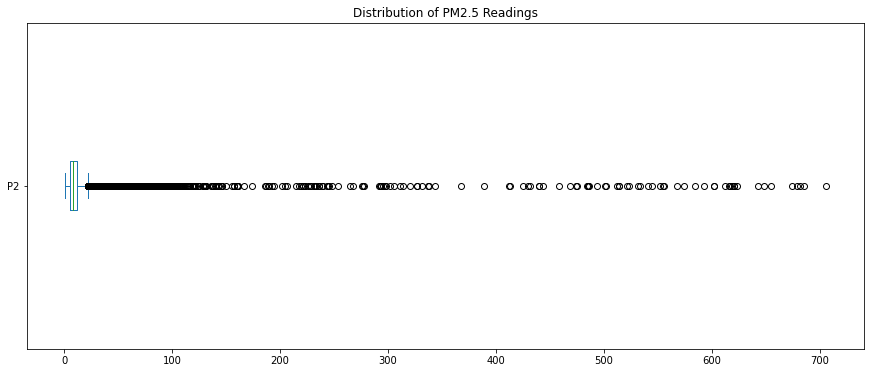

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].plot(kind = "box", vert = False, title = "Distribution of PM2.5 Readings", ax = ax)

In [11]:
low, high = df["P2"].quantile([0, 0.9])
df["P2"] = df[df["P2"].between(low, high)]

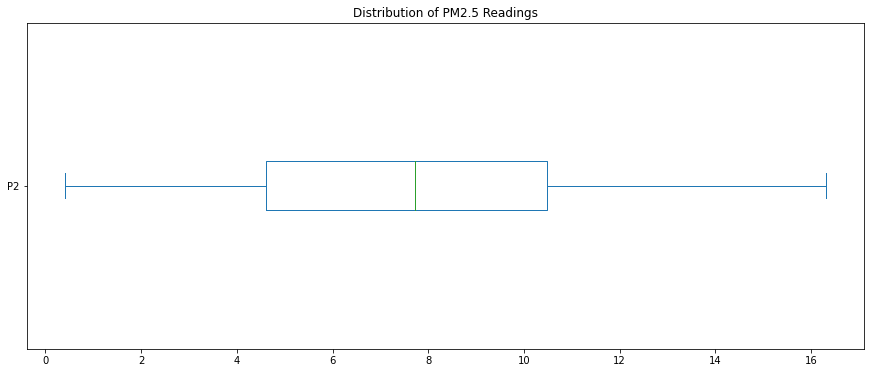

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].plot(kind = "box", vert = False, title = "Distribution of PM2.5 Readings", ax = ax)

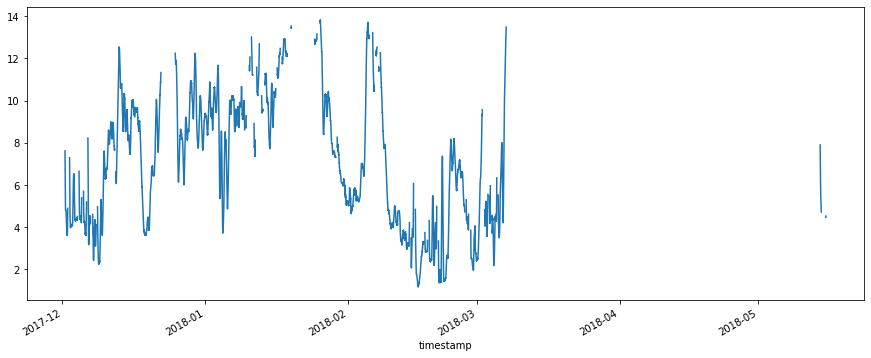

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].rolling(168).mean().plot(ax=ax)

In [14]:
y = df["P2"].resample("1H").mean().fillna(method = "ffill")
y.head()

timestamp
2017-12-01 03:00:00+03:00     4.204167
2017-12-01 04:00:00+03:00     4.344583
2017-12-01 05:00:00+03:00     9.375417
2017-12-01 06:00:00+03:00    14.057917
2017-12-01 07:00:00+03:00    14.454783
Freq: H, Name: P2, dtype: float64

Text(0, 0.5, 'Correlation Coefficient')

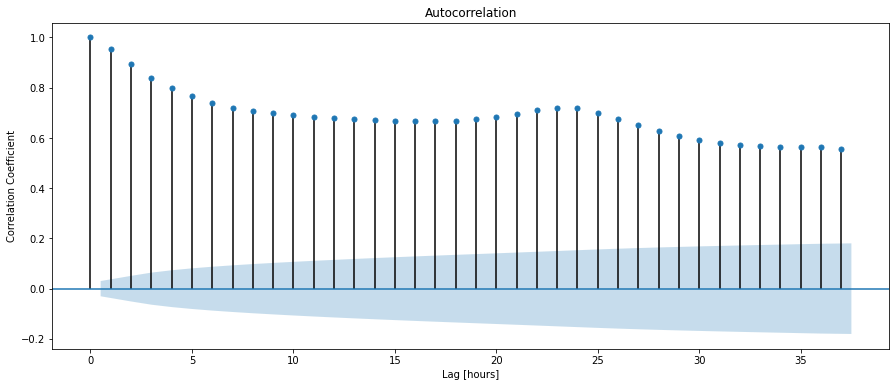

In [15]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_acf(y, ax = ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

Text(0, 0.5, 'Correlation Coefficient')

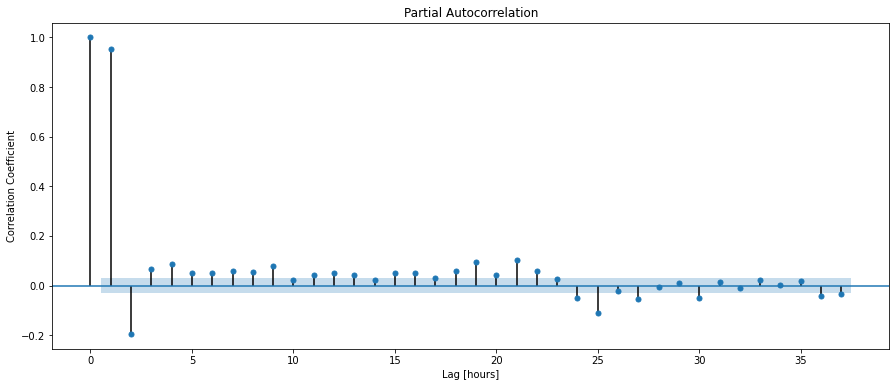

In [16]:
fig, ax = plt.subplots(figsize = (15, 6))
plot_pacf(y, ax = ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")

In [17]:
cutoff = int(len(y)*0.95)
y_train = y.iloc[: cutoff]
y_test = y.iloc[cutoff: ]
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (3964,)
y_test shape: (209,)


In [18]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 8.43
Baseline MAE: 2.39


# AutoReg

In [19]:
model = AutoReg(y_train, 26, old_names = False).fit()

In [20]:
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_pred, y_train.loc[y_pred.index])
print("Training MAE:", training_mae)

Training MAE: 0.3882559510814766


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [21]:
y_train_resid = y_train - y_pred
y_train_resid.tail()

timestamp
2018-05-15 02:00:00+03:00    0.256831
2018-05-15 03:00:00+03:00    0.341997
2018-05-15 04:00:00+03:00   -0.021916
2018-05-15 05:00:00+03:00    0.004799
2018-05-15 06:00:00+03:00    0.189140
Freq: H, dtype: float64

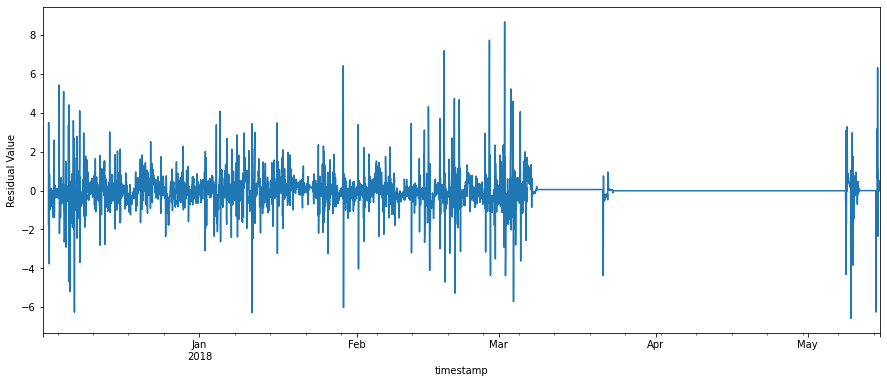

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
y_train_resid.plot(ylabel = "Residual Value", ax = ax)

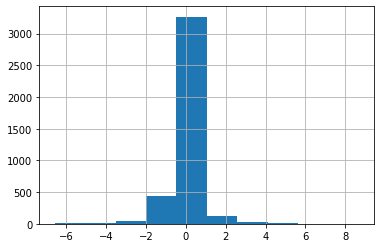

In [23]:
y_train_resid.hist()

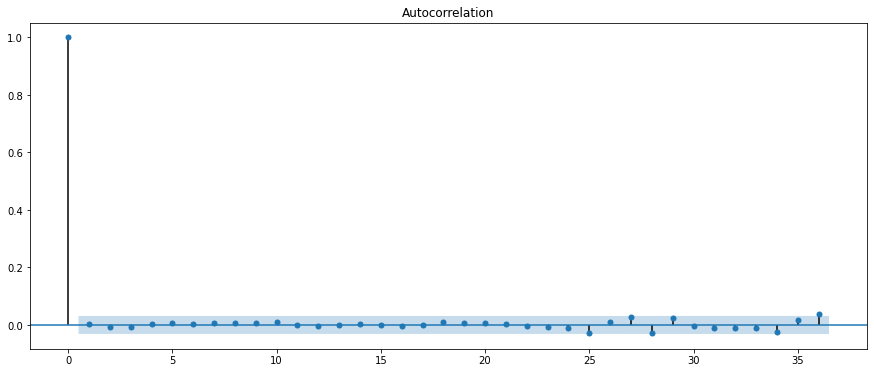

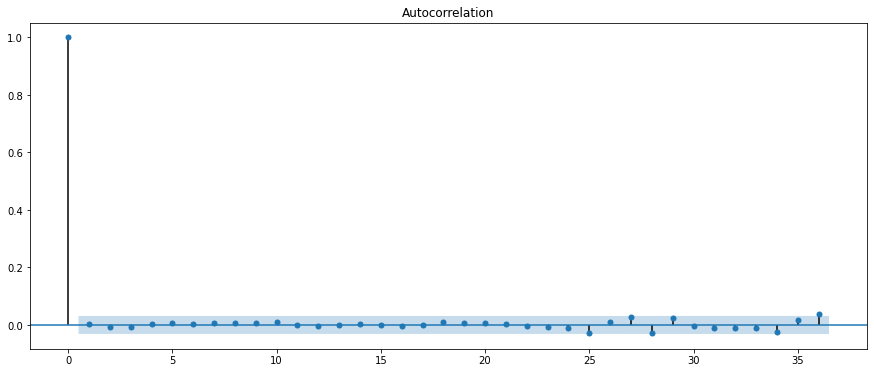

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid.dropna(), ax = ax)

In [25]:
y_pred_test = model.predict(y_test.index.min(), y_test.index.max())
test_mae = mean_absolute_error(y_pred_test, y_test)
print("Test MAE:", test_mae)

Test MAE: 3.7641681517782977


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [26]:
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index
)
df_pred_test.head()

,y_test,y_pred
timestamp,,
2018-05-15 07:00:00+03:00,9.331333,9.195576
2018-05-15 08:00:00+03:00,9.331333,9.171439
2018-05-15 09:00:00+03:00,5.842500,8.980302
2018-05-15 10:00:00+03:00,3.554706,8.242768
2018-05-15 11:00:00+03:00,3.891875,7.115192


In [27]:
fig = px.line(df_pred_test, labels={"value": "P2"})
fig.show()

In [28]:
%%capture

y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = AutoReg(history, lags = 26).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

In [29]:
test_mae = mean_absolute_error(y_pred_wfv, y_test)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 1.33


Communicate

In [30]:
test_pred = pd.DataFrame(
{"y_test" : y_test, "y_pred_wfv": y_pred_wfv}, index = y_test.index
)
fig = px.line(test_pred)
fig.show()

# ARIMA

In [31]:
p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

In [32]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = []
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = sm.tsa.arima.ARIMA(y_train, order = order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(y_pred, y_train)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 1.08 seconds.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Trained ARIMA (0, 0, 1) in 1.36 seconds.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



Trained ARIMA (0, 0, 2) in 2.46 seconds.
Trained ARIMA (8, 0, 0) in 6.8 seconds.
Trained ARIMA (8, 0, 1) in 17.27 seconds.
Trained ARIMA (8, 0, 2) in 16.23 seconds.
Trained ARIMA (16, 0, 0) in 15.02 seconds.
Trained ARIMA (16, 0, 1) in 17.93 seconds.
Trained ARIMA (16, 0, 2) in 54.8 seconds.
Trained ARIMA (24, 0, 0) in 53.11 seconds.


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (24, 0, 1) in 132.39 seconds.


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Trained ARIMA (24, 0, 2) in 154.44 seconds.

{0: [2.386936149292867, 1.3507798770379311, 0.9330811803644554], 8: [0.39731933698952016, 0.3953573936731023, 0.395654812874984], 16: [0.39656686493337157, 0.39666338575216514, 0.3962808309150907], 24: [0.39741998677615203, 0.39647780342940275, 0.3997501620914229]}


In [34]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,2.3869,0.3973,0.3966,0.3974
1,1.3508,0.3954,0.3967,0.3965
2,0.9331,0.3957,0.3963,0.3998


Text(0.5, 1.0, 'ARMA Grid Search (Criterion: MAE)')

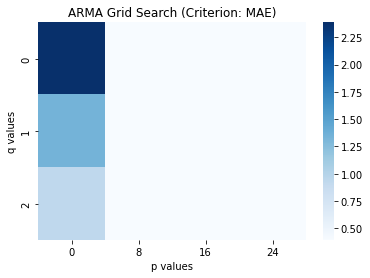

In [36]:
sns.heatmap(mae_df, cmap = "Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA Grid Search (Criterion: MAE)")

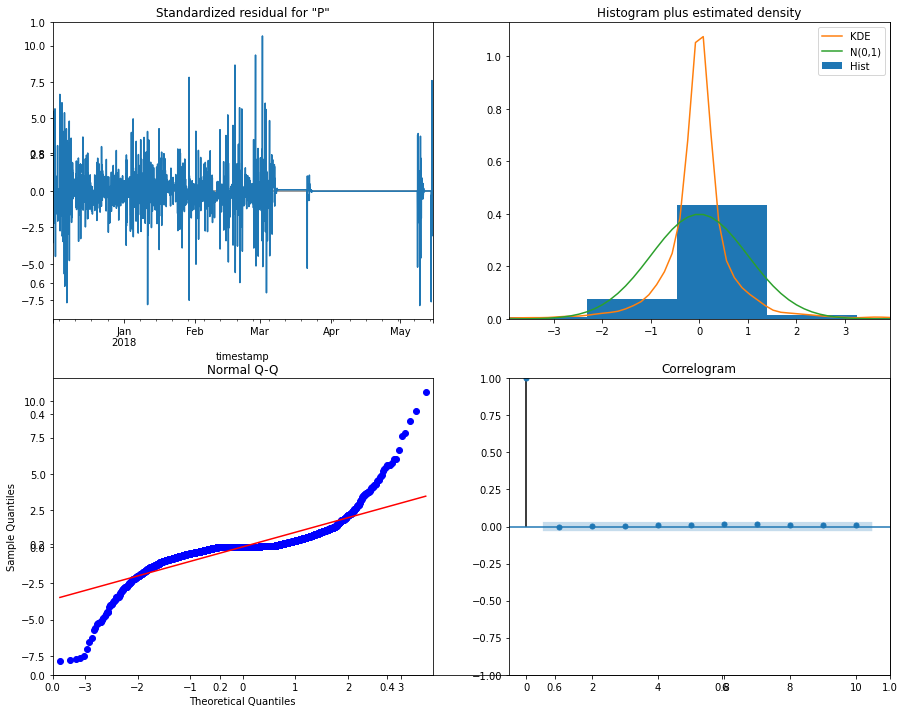

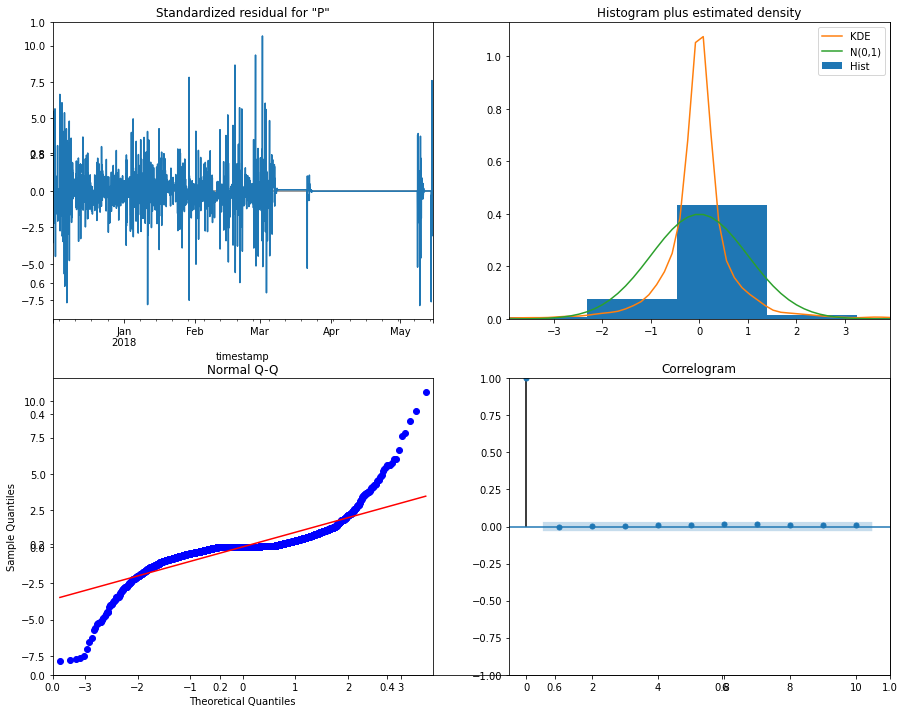

In [37]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig = fig)

In [49]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = sm.tsa.arima.ARIMA(history, order = (8, 0, 1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

<ipython-input-49-8e7730c233f1>:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [50]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 1.37


Communicate

In [51]:
df_predictions = pd.DataFrame({"y_test": y_test, "y_pred_wfv": y_pred_wfv})
fig = px.line(df_predictions, labels = {"value": "PM2.5"})
fig.show()
